# House Price Prediction

* In this project, we develop a machine learning-based house price prediction model using Regression, Decision Tree, and Random Forest algorithms. Through Exploratory Data Analysis (EDA) and data preprocessing, we clean and transform the dataset to improve model accuracy. After testing different models, the Random Forest Regressor achieves the highest accuracy, making it the optimal choice for prediction.

* To enhance user experience, we integrate the trained model into an interactive Gradio web application. Users can input property details dynamically without predefined lists, and the system provides an estimated house price in Lakhs (₹ Lakh).

* Key Features of This Project
* ✔ Data Preprocessing & EDA – Handling missing values, encoding categorical data, and feature scaling.
* ✔ Model Implementation – Regression, Decision Tree, and Random Forest comparison.
* ✔ Best Model Selection – Random Forest chosen for superior accuracy.
* ✔ Dynamic User Input – No hardcoded lists; values are extracted from the dataset.
* ✔ Interactive Gradio Interface – User-friendly web app for real-time price prediction.

* This project showcases the power of machine learning in real estate pricing and provides an efficient, data-driven approach to house price estimation in Mumbai.

# Import Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading Dataset

In [6]:
df = pd.read_csv(r"C:\Users\dell\Downloads\Mumbai Housing Price\Mumbai House Prices.csv")

# EDA & Preprocessing 

In [8]:
df.head()

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


In [9]:
df.shape

(76038, 9)

* There 75038 Rows and 8 Independent Features and 1 Dependent Feature

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bhk         76038 non-null  int64  
 1   type        76038 non-null  object 
 2   locality    76038 non-null  object 
 3   area        76038 non-null  int64  
 4   price       76038 non-null  float64
 5   price_unit  76038 non-null  object 
 6   region      76038 non-null  object 
 7   status      76038 non-null  object 
 8   age         76038 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 5.2+ MB


* There Majority of the Features are Categorical

In [13]:
df.dtypes

bhk             int64
type           object
locality       object
area            int64
price         float64
price_unit     object
region         object
status         object
age            object
dtype: object

* There 3 Features are Numerical
* And 6 Features are Categorical

In [15]:
df.isna().sum()

bhk           0
type          0
locality      0
area          0
price         0
price_unit    0
region        0
status        0
age           0
dtype: int64

* There no any missing/Null value

In [17]:
df.head()

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


* Here we need to marge the price feature and price_unit feature
* So we create a function for if the price_unit is Cr then it multiply by the 100 to convert into lak
* and if the price_unit is Lak then it'll return as it's.

In [19]:
def converting(row):
    if row['price_unit']=='Cr':
        return row['price']*100
        # For converting Cr to lak 
    elif row['price_unit']=='L':
        return row['price']
        # Beacuse Lak is already in lak form
    else:
        return None

In [20]:
df['price_in_lak'] = df.apply(converting, axis = 1)

* Here we creating a feature name 'price_in_lak' and calling a 'converting' funtion and apply the calculation on all the rows

In [22]:
df = df.drop(['price','price_unit'],axis=1)

* Here drop the both features price and price_unit 

In [24]:
df.head()

,bhk,type,locality,area,region,status,age,price_in_lak
0,3,Apartment,Lak And Hanware The Residency Tower,685,Andheri West,Ready to move,New,250.00
1,2,Apartment,Radheya Sai Enclave Building No 2,640,Naigaon East,Under Construction,New,52.51
2,2,Apartment,Romell Serene,610,Borivali West,Under Construction,New,173.00
3,2,Apartment,Soundlines Codename Urban Rainforest,876,Panvel,Under Construction,New,59.98
4,2,Apartment,Origin Oriana,659,Mira Road East,Under Construction,New,94.11


* Here need to delete the Locality Feature Beacuse it doesn't make sense for our model

In [26]:
 df = df.drop('locality',axis= 1)

In [27]:
df.head()

,bhk,type,area,region,status,age,price_in_lak
0,3,Apartment,685,Andheri West,Ready to move,New,250.00
1,2,Apartment,640,Naigaon East,Under Construction,New,52.51
2,2,Apartment,610,Borivali West,Under Construction,New,173.00
3,2,Apartment,876,Panvel,Under Construction,New,59.98
4,2,Apartment,659,Mira Road East,Under Construction,New,94.11


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bhk,76038.0,2.015111,0.922754,1.00,1.0,2.0,3.0,10.0
area,76038.0,1024.536850,670.276165,127.00,640.0,872.0,1179.0,16000.0
price_in_lak,76038.0,168.417795,217.665511,4.49,64.0,110.0,194.0,6000.0


* Dataset has minimum 1 BHK and Highest 10 BHK
* Area start from the 127 SqFt and Last option 16000 SqFt
* Housing Price is starting from the 4.49Lak and highest price of the House is 6000lak

# Numeric Features

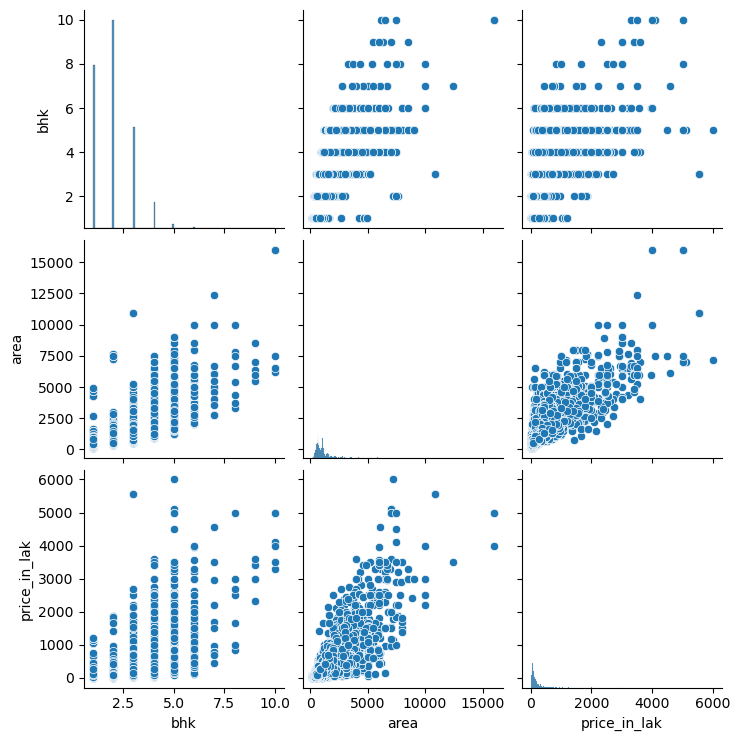

In [31]:
sns.pairplot(df)

* Data seem to be Linear

<Axes: ylabel='bhk'>

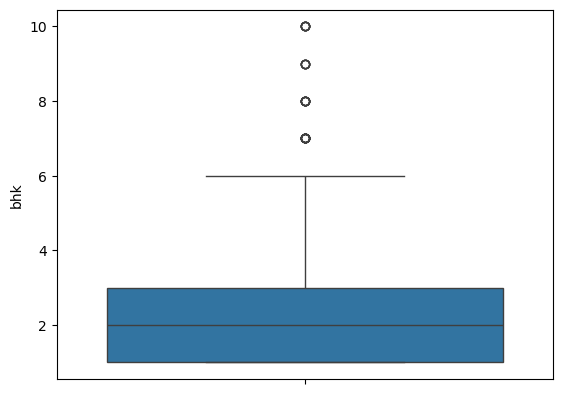

In [33]:
sns.boxplot(df['bhk'])

* BHK feature has few outliers on the high

<Axes: ylabel='area'>

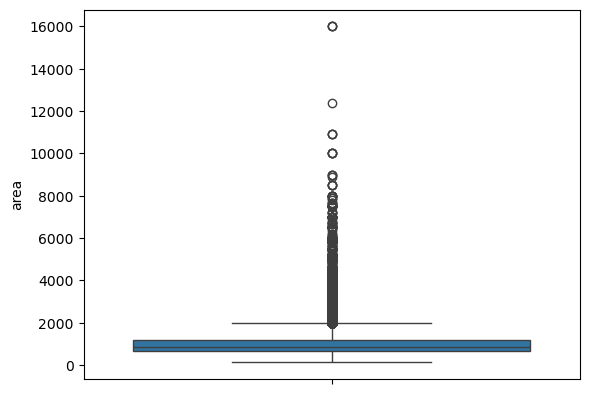

In [35]:
sns.boxplot(df['area'])

* There many outliers in Area Feature

<Axes: ylabel='price_in_lak'>

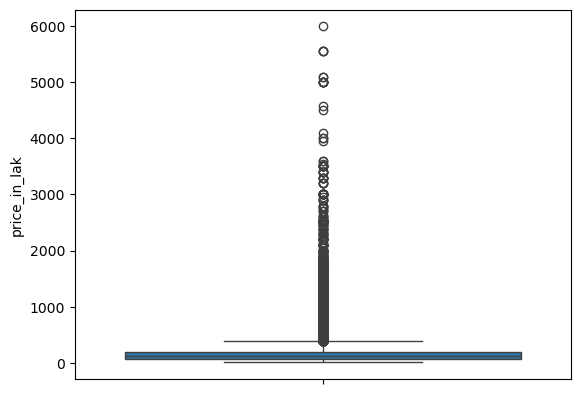

In [37]:
sns.boxplot(df['price_in_lak'])

# Categorical Features

<Axes: xlabel='count', ylabel='age'>

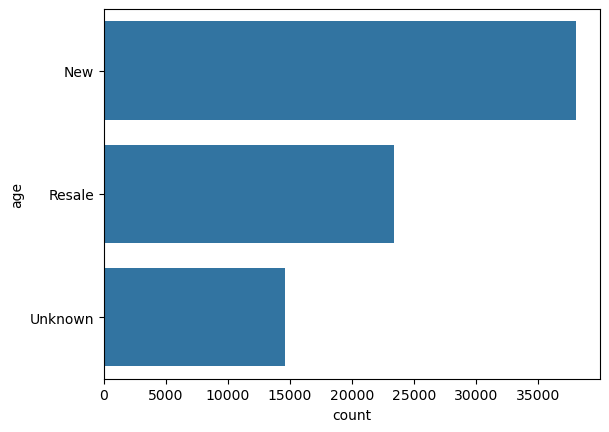

In [39]:
sns.countplot(df['age'])

In [40]:
df['age'].value_counts()

age
New        38072
Resale     23357
Unknown    14609
Name: count, dtype: int64

* Majority of the house/flats are new
* And aproximate 23 thousand houses are resale 

<Axes: xlabel='count', ylabel='region'>

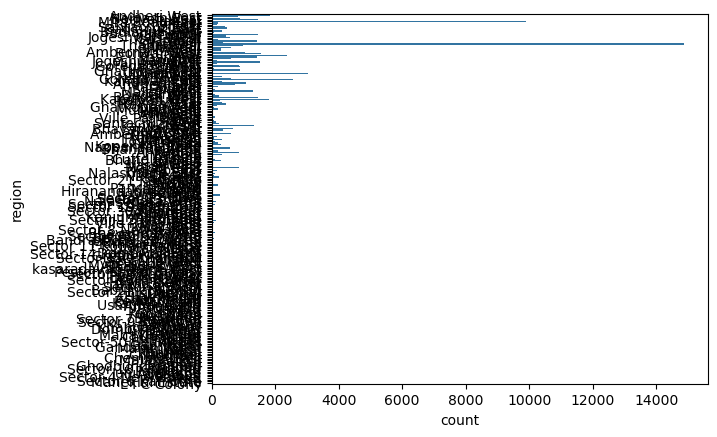

In [42]:
sns.countplot(df['region'])

In [43]:
df['region'].value_counts()

region
Thane West         14868
Mira Road East      9902
Dombivali           3041
Kandivali East      2568
Kharghar            2362
                   ...  
Police Colony          1
GTB Nagar              1
Bandra                 1
Sector 14 Vashi        1
Goregaon               1
Name: count, Length: 228, dtype: int64

* Majorit of the houses / Flats are available in Thane West location

<Axes: xlabel='count', ylabel='status'>

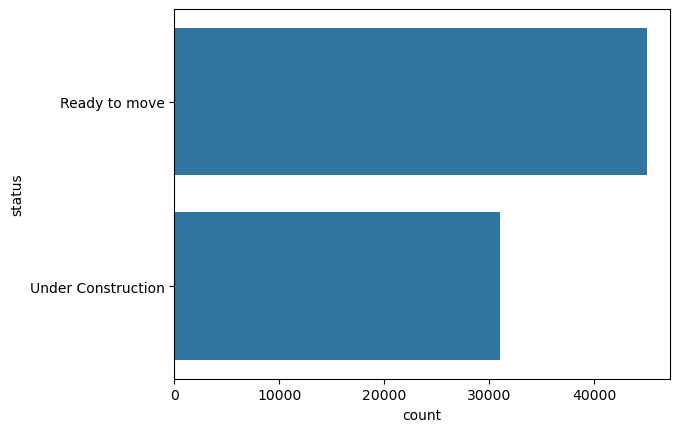

In [45]:
sns.countplot(df['status'])

In [46]:
df['status'].value_counts()

status
Ready to move         44982
Under Construction    31056
Name: count, dtype: int64

* Majority of the House/Flats are Ready to stay, Approximate 60%
* And Approximately 40% houses/Flats are under construction Can't stay.

<Axes: xlabel='count', ylabel='type'>

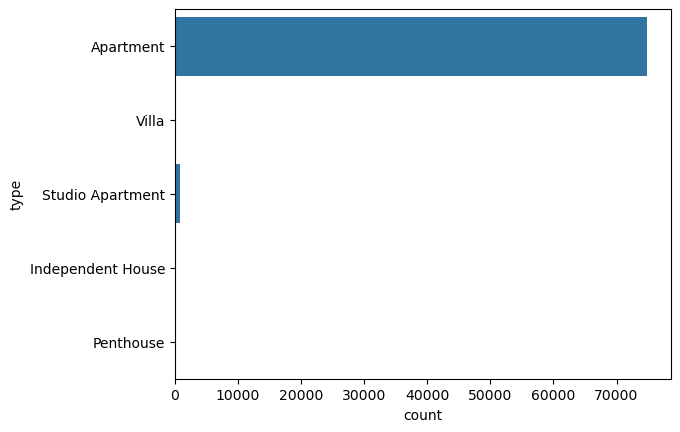

In [48]:
sns.countplot(df['type'])

In [49]:
df['type'].value_counts()

type
Apartment            74854
Studio Apartment       882
Villa                  226
Independent House       73
Penthouse                3
Name: count, dtype: int64

* In mumbai The Majority of the areas are Apartment, Approximate 98% of the area are covered
* There 882 are Studio Apartment
* There 226 are villa
* There Independent House 73
* There only 3 Penthouse

# Labeling The categorical Features

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
# Encode categorical features dynamically
categorical_features = df.select_dtypes(include=['object']).columns

encoders = {}
for col in categorical_features:
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col])

* We have mutliple features as categorical do we use for loop do it

In [55]:
df.head()

,bhk,type,area,region,status,age,price_in_lak
0,3,0,685,8,0,0,250.00
1,2,0,640,124,1,0,52.51
2,2,0,610,31,1,0,173.00
3,2,0,876,140,1,0,59.98
4,2,0,659,117,1,0,94.11


# Divide the data into X and y

In [57]:
X = df.iloc[:,:-1]

In [58]:
y = df.iloc[:,-1]

In [59]:
X.head(3)

,bhk,type,area,region,status,age
0,3,0,685,8,0,0
1,2,0,640,124,1,0
2,2,0,610,31,1,0


* These are Independent Features

In [61]:
y.head(3)

0    250.00
1     52.51
2    173.00
Name: price_in_lak, dtype: float64

* This is a Dependent Feature

# Spliting the data set for Training and Testing

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Model Selection

1. Here i first implement the Linear Regression Because data is linear
2. Second implement the Decision Tree because majority of the features are Categorical
3. Here Third implementation of the Randomforest because we have enough data for implementing the RF for better accuracy

# 1. Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
reg_model = LinearRegression()

In [71]:
reg_model.fit(X_train,y_train)

LinearRegression()

# Linear Regression Evaluation Model

In [73]:
y_pred_reg = reg_model.predict(X_test)

In [74]:
from sklearn.metrics import r2_score,root_mean_squared_error

In [75]:
print(r2_score(y_test,y_pred_reg))

0.6151520023580485


In [76]:
root_mean_squared_error(y_test,y_pred_reg)

138.71618831542244

# 2. Desicion Tree

In [78]:
from sklearn.tree import DecisionTreeRegressor

In [79]:
dec_model = DecisionTreeRegressor()

In [80]:
dec_model.fit(X_train,y_train)

DecisionTreeRegressor()

# Desicion Tree Evaluation Model

In [82]:
y_pred_dec = dec_model.predict(X_test)

In [83]:
r2_score(y_test,y_pred_dec)

0.8108044349510674

In [84]:
root_mean_squared_error(y_test,y_pred_dec)

97.26083795022664

# 3. Randomforest 

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
rfr_model = RandomForestRegressor(n_estimators=100,random_state=123)

In [88]:
rfr_model.fit(X_train,y_train)

RandomForestRegressor(random_state=123)

# RandomForest Evaluation Model

In [90]:
y_pred_rfr = rfr_model.predict(X_test)

In [91]:
r2_score(y_test,y_pred_rfr)

0.8775299297788167

In [92]:
root_mean_squared_error(y_test,y_pred_rfr)

78.25237264575125

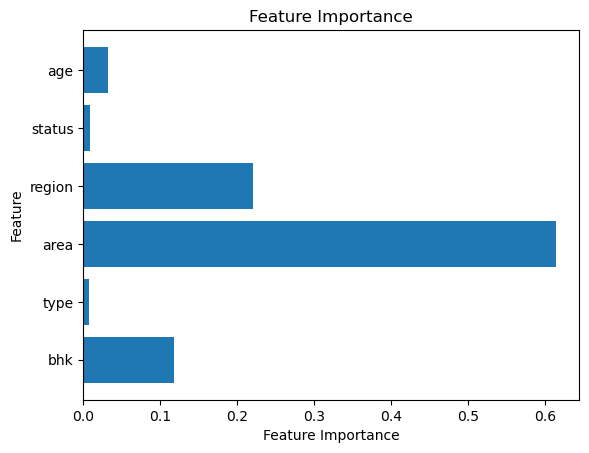

In [93]:
feature_names = X_train.columns
feature_importances = rfr_model.feature_importances_
plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

* Here we can see that, Area feature is most important to decide the price of the houses
* And 2nd one is Location(region) is most important for predictions the price of the houses
* And 3rd one is BHK does matter to predict the price of the houses

# Gradio GUI

In [96]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.


In [97]:
df.head()

,bhk,type,area,region,status,age,price_in_lak
0,3,0,685,8,0,0,250.00
1,2,0,640,124,1,0,52.51
2,2,0,610,31,1,0,173.00
3,2,0,876,140,1,0,59.98
4,2,0,659,117,1,0,94.11


In [169]:
import gradio as gr
# Function for prediction
def predict_price(*features):
    #using *features selecting the all the features from X 
    # For taking input from the users and store into tupple and then convert into dataframe
    input_data = pd.DataFrame([features], columns=X.columns)

    # Encode categorical features
    for col in encoders:
        if col in input_data.columns:
            input_data[col] = encoders[col].transform(input_data[col].astype(str))
            
    # Predict price
    predicted_price = rfr_model.predict(input_data)[0]
    return f"Predicted House Price: ₹ {predicted_price:,.2f} Lakh"

# Create tupple dynamic inputs based on dataset features
inputs = []
for col in X.columns:
    if col in encoders:  # Categorical feature
        choices = list(encoders[col].classes_)
        inputs.append(gr.Dropdown(choices=choices, label=col))
    else:  # Numerical feature
        inputs.append(gr.Number(label=col))

# Gradio Interface
interface = gr.Interface(fn=predict_price, inputs=inputs, outputs="text", title="Mumbai House Price Prediction")

# Launch
interface.launch()


* Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


# Conclusion 

1. Dataset Overview
* The dataset contains 75,038 rows with 8 independent features and 1 dependent feature (target variable).
* Most features are categorical, requiring encoding before model training.
2. EDA & Preprocessing
* Checked dataset shape and info.
* Identified categorical features, which were likely encoded.
* Possible missing value handling.
3. Model Implementation
* Linear Regression: Used as a benchmark model.
* Decision Tree Regression: Captured non-linear relationships.
* Random Forest Regression: Provided the best accuracy.

* In this project, we successfully developed a machine learning-based house price prediction model for properties in Mumbai. By performing Exploratory * Data Analysis (EDA) and applying essential data preprocessing techniques, we ensured that the dataset was clean and well-structured for training.

* We implemented and compared three machine learning models:
* ✔ Linear Regression
* ✔ Decision Tree Regressor
* ✔ Random Forest Regressor

* After evaluating their performance, the Random Forest Regressor demonstrated the highest accuracy and was selected as the best model for predicting 
  house prices.

* To make the model accessible and interactive, we built a Gradio-based web application that allows users to input property details and receive real-time price predictions in Lakhs (₹ Lakh). Instead of relying on predefined lists, the app dynamically extracts feature values from the dataset, making it more flexible and user-friendly.

* Key Takeaways:
* ✅ Data Preprocessing is Crucial – Handling missing values, encoding categorical variables, and scaling numeric features significantly improved 
 model performance.
* ✅ Model Selection Matters – The Random Forest Regressor outperformed other models, proving its effectiveness for this problem.
* ✅ Interactive Applications Enhance Usability – The Gradio interface provides an easy-to-use platform for real-time predictions.